### Attempt to replicate figure 1 from Kitanidis et al., 2019

In [2]:
import sys
import numpy as np
import pandas
from astropy import constants as const
from astropy import units as u
from astropy.io import fits
from astropy.io import ascii
import random
import matplotlib.pyplot as plt
import wget
import seaborn as sns
import healpy

In [3]:
from platform import python_version
print(python_version())

3.8.8


In [4]:
#Open fits images
hdulistBricksSummary = fits.open('../bricks_data/survey-bricks-dr9-south.fits')
dataSummary = hdulistBricksSummary[1].data
bricknameSummary = dataSummary.field('brickname')
raSummary = dataSummary.field('ra')
decSummary = dataSummary.field('dec')
brickIDSummary = dataSummary.field('brickid')
nobjsSummary = dataSummary.field('nobjs')
nexp_gSummary = dataSummary.field('nexp_g')
nexp_rSummary = dataSummary.field('nexp_r')
nexp_zSummary = dataSummary.field('nexp_z')

raDec = np.stack((raSummary, decSummary,nexp_gSummary,nexp_rSummary,nexp_zSummary), axis=-1)
print(raSummary)
print(decSummary)
print(raDec.shape)

print(nexp_gSummary)
print(raDec[:,2])


[1.25000000e-01 1.25000000e-01 1.25000000e-01 ... 3.59850000e+02
 3.59849498e+02 3.59849246e+02]
[-0.25 -0.5  -0.75 ... 33.75 34.   34.25]
(253658, 5)
[8 8 9 ... 2 1 0]
[8. 8. 9. ... 2. 1. 0.]


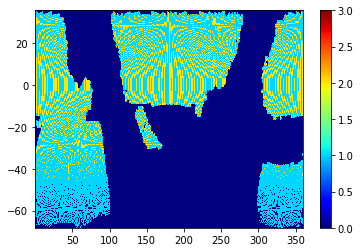

In [7]:
plt.hist2d(raSummary, decSummary, bins=(1000,416), cmap="jet")
plt.colorbar()
plt.show()

In [8]:
print(len(np.unique(raSummary)))
print(np.unique(raSummary))
print(len(np.unique(decSummary)))

binsRa = np.arange(-65, 285, 0.25)
binsDec = np.arange(-70, 40, 0.25)

149371
[1.25000000e-01 1.25173853e-01 1.25348189e-01 ... 3.59874652e+02
 3.59874826e+02 3.59875000e+02]
417


#### Exposure Density in G Band 

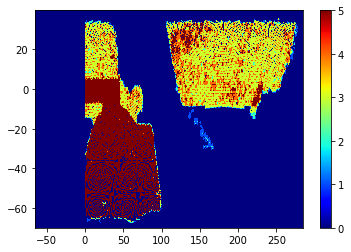

In [9]:
raExpG = np.zeros(nexp_gSummary.sum())
decExpG = np.zeros(nexp_gSummary.sum())

index = 0

for i in range(len(nexp_gSummary)):
    for j in range(nexp_gSummary[i]):
        raExpG[index] = raSummary[i]
        decExpG[index] = decSummary[i]
        index += 1

plt.hist2d(raExpG, decExpG, bins=[binsRa, binsDec], cmap="jet")
plt.clim(0,5)
plt.colorbar()
plt.show()

#### Exposure Density in R Band

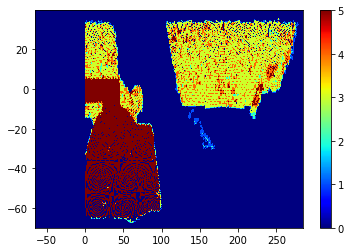

In [11]:
raExpR = np.zeros(nexp_rSummary.sum())
decExpR = np.zeros(nexp_rSummary.sum())

index = 0

for i in range(len(nexp_rSummary)):
    for j in range(nexp_rSummary[i]):
        raExpR[index] = raSummary[i]
        decExpR[index] = decSummary[i]
        index += 1

plt.hist2d(raExpR, decExpR, bins=[binsRa, binsDec],cmap="jet")
plt.clim(0,5)
plt.colorbar()
plt.show()

#### Exposure Density in Z Band

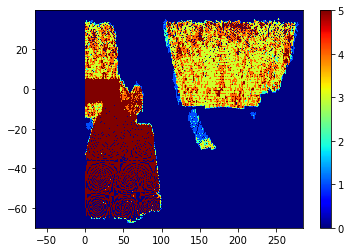

In [12]:
raExpZ = np.zeros(nexp_zSummary.sum())
decExpZ = np.zeros(nexp_zSummary.sum())

index = 0

for i in range(len(nexp_zSummary)):
    for j in range(nexp_zSummary[i]):
        raExpZ[index] = raSummary[i]
        decExpZ[index] = decSummary[i]
        index += 1

plt.hist2d(raExpZ, decExpZ, bins=[binsRa, binsDec], cmap="jet")
plt.clim(0,5)
plt.colorbar()
plt.show()
